# Saudi Arabia Used Cars

Source: [Saudi Arabia Used Cars Dataset](https://www.kaggle.com/datasets/turkibintalib/saudi-arabia-used-cars-dataset)

# Content

- Business Problem Understanding
- Data Understanding
- Data Preprocessing
- Modeling
- Conclusion
- Recommendation

# Business Problem Understanding

**Context**

Used cars adalah jenis kendaraan yang sebelumnya memiliki 1 atau lebih pemilik. Jenis mobil seperti ini sangat populer di negara berkembang seperti Saudi Arabia. Terjadi penurunan penjualan mobil baru pada tahun 2020 akibat lockdown total akibat Covid-19. Lockdown mengakibatkan orang-orang menjual mobilnya, sehingga terjadi pergeseran kepemilikan mobil. Ditambah lagi,  pemerintah memberlakukan pembatasan kegiatan masyarakatnya sehingga ekonomi mengalami kemunduran. Setelah pandemi berakhir, pasar mobil bekas lebih diminati daripada mobil baru karena orang mulai mencari mobil yang harganya terjangkau untuk perjalanan sehari-hari ataupun perjalanan jarak jauh. 

Bisnis mobil bekas merupakan salah satu bisnis yang sedang berkembang dan memiliki pasar yang kompetitif. Menjual dan membeli mobil bekas bisa menjadi hal yang sulit saat menentukan harga yang tepat. Jika harga mobil yang dijual terlalu mahal dibanding platform lain dengan fitur sejenis di wilayah sekitar tentu akan sulit menjual mobil tersebut. Sebaliknya,  jika harga mobil terlalu murah, tentu penjual mobil (host) tidak akan mendapatkan profit yang sepadan. Banyak faktor yang memengaruhi nilai dari suatu mobil bekas. Hal ini perlu dipahami oleh penjual karena berhubungan dengan profit yang akan didapat. 

syarah.com merupakan sebuah platform yang menyediakan dan menjual lebih  dari 50 merk mobil dan tersebar di lebih dari 20 Kota di Saudi Arabia. Platform ini hanya sebagai pihak ketiga antara pemilik mobil (host) dan calon pembeli mobil. model bisnis ini membebaskan host untuk menentukan harga jual mobilnya, hal ini menyulitkan host. Dataset yang digunakan ini berisi 5624 record mobil bekas yang dikumpulkan dari syarah.com. Setiap baris mewakili mobil bekas dengan informasi nama merk, model, tipe transmisi atau gear type, tahun pembuatan, asal, opsi, kapasitas mesin, jarak yang ditempuh mobil, status negosiasi, dan harga mobil.


**Problem Statement**

Salah satu tantangan terbesar bagi perusahaan yang menjual mobil bekas adalah pemecehan masalah untuk dapat memiliki model bisnis yang menguntungkan secara finansial bagi pemilik/penjual (host) mobil dengan menjual mobil dengan harga yang sesuai, serta dapat memberikan pengalaman yang baik bagi pelanggan. Harga yang terlalu tinggi akan membuat pelanggan tidak tertarik untuk membeli dan memilih platform lain, namun harga yang terlalu rendah akan membuat pemilik rugi atau tidak mendapat profit yang sepadan.

**Goals**

Berdasarkan permasalahan tersebut, perusahaan platform tentu perlu memiliki alat atau 'tool' yang dapat memprediksi serta membantu klien (pemilik mobil) untuk menentukan harga yang tepat untuk tiap mobil bekas yang akan dijual. Adanya perbedaan merk, model, tipe transmisi, jarak tempuh dan sebagainya dapat menambah keakuratan prediksi harga mobil bekas, yang mana dapat memberikan harga yang kompetitif di pasaran namun tetap mendatangkan profit bagi pemilik mobil juga harga yang masih terjangkau bagi pelanggan.

Bagi perusahaan 'tool' ini dapat meningkatkan jumlah host dan listing, dengan kata lain, semakin banyak pemilik mobil yang ingin menjual mobilnya di platform ini dan pembeli yang membeli mobil di platform ini berarti dapat meningkatkan revenue perusahaan platform yang didapat dari 'fee charge' baik dari pemilik mobil maupun pembeli mobil.



**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan suatu mobil dengan yang lainnya. Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tool' atau alat prediksi harga mobil bekas yang baru masuk dalam daftar, yang mana akan berguna bagi perusahaan dalam menentukan harga mobil bekas yang tepat agar terhindar dari underprice atau overprice.

**Metric Evaluation**

Metric Evaluasi yang akan digunakan adalah MAPE, MAE, dan RMSE. RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan presentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan berarti model semakin akurat dalam mempredisksi harga mobil bekas sesuai dengan limitasi fitur yang digunakan.

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model regresi linear. Nilai R-squared digunakan unutk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data, semakin mendekati 1 maka semakin bagus modelnya terhadap data observasi. Namun, metrik R-squared tidak valid untuk model non linear.

# Data Understanding

* Setiap baris data merepresentasikan informasi mobil yang akan dijual


**Attribute Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Type | Object | Name of a car product |
| Region | Object | The region in which the used car was offered for sale |
| Make | Object | Name of the car company |
| Gear_Type | Object | Automatic / Manual |
| Origin | Object | Country of Importer (Gulf / Saudi / Other) |
| Options | Object | Full Options / Semi-Full / Standard |
| Year | Integer | Year of Manufacturing |
| Engine_size | Float | The engine size of used car |
| Mileage | Integer | The average distance that a vehicle can travel on (in km) |
| Negotiable | Bool | If True, the price is 0. This means the price not set (Negotiable) |
| Price | Integer | Price of the used car (in SAR) |

<br>

Pada tabel diatas terlihat bahwa dataset ini terdiri dari 11 kolom. Kolom 'Price' merupakan target atau variabel dependen, sedangkan 10 kolom lainnya merupakan fitur atau variabel independen. Goals yang akan kita capai adalah membuat prediksi harga mobil dengan menggunakan fitur-fitur yang yang ada pada dataset.

In [1]:
# Library yang diperlukan untuk eksplorasi data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read dataset
df = pd.read_csv('data_saudi_used_cars.csv')
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


## Exploratory Data Analysis

**Distribution of Saudi Arabia Used Cars price**

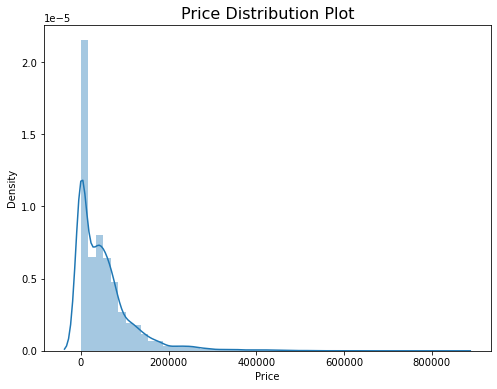

In [3]:
plt.figure(figsize=(8, 6))
sns.distplot(df['Price'])
plt.title('Price Distribution Plot', size=16);

Berdasarkan plot distribusi harga mobil bekas diatas, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewed positif pada fitur price.

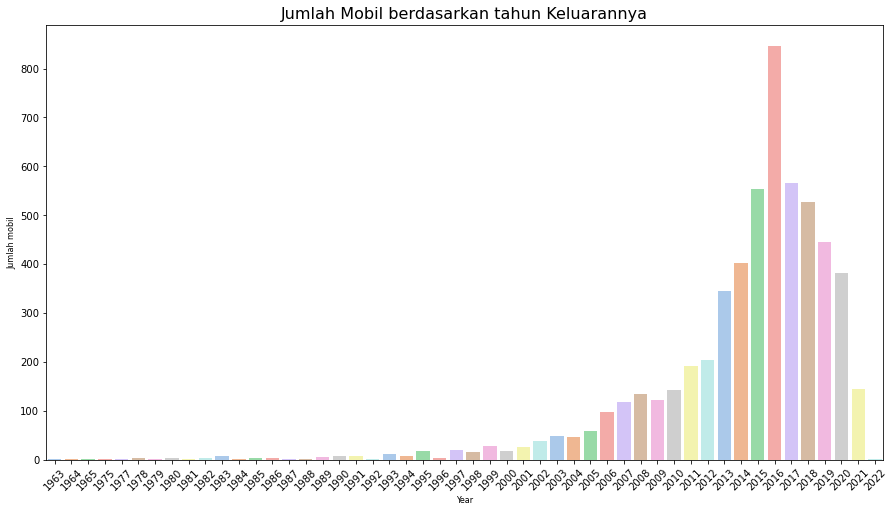

In [4]:
# Mengetahui Mobil keluaran tahun berapa saja yang dijual oleh syarah.com melalui visualisasi

plt.figure(figsize=(15,8))
sns.countplot(df['Year'],
            order = df['Year'].value_counts().index.sort_values(), palette='pastel')
plt.xticks(np.arange(len(df['Year'].unique())), rotation=45)
plt.xlabel('Year', size = 8)
plt.ylabel('Jumlah mobil', size = 8)
plt.title ('Jumlah Mobil berdasarkan tahun Keluarannya', size = 16)
plt.show()

Berdasarkan gambar diatas terlihat bahwa pada perusahaan syarah.com mobil yang tersedia paling banyak adalah mobil bekas keluaran tahun 2016. Syarah.com juga menyediakan beberapa mobil bekas klasik karena terlihat pada gambar bahwa terdapat beberapa mobil dengan tahun keluaran lama (tahun 1963-1999).

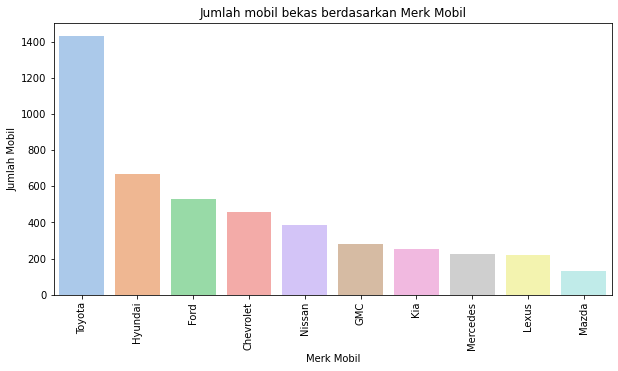

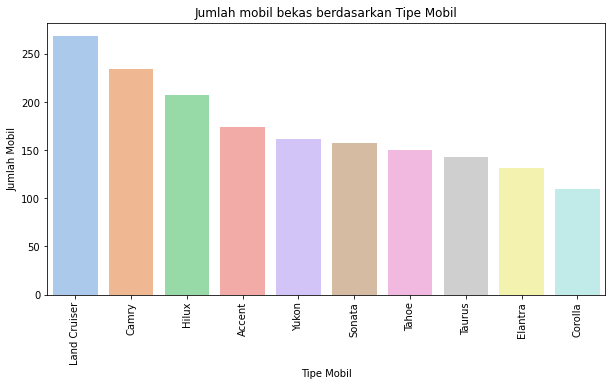

In [5]:
# Mengetahui 10 company mobil yang dijual perusahaan
a = df['Make'].value_counts().sort_values(ascending=False).iloc[:10]
plt.figure(figsize=(10,5))
sns.barplot(x=a.index, y=a, palette='pastel')
plt.title('Jumlah mobil bekas berdasarkan Merk Mobil')
plt.xticks(np.arange(len(a.unique())), rotation=90)
plt.xlabel('Merk Mobil')
plt.ylabel('Jumlah Mobil')
plt.show()


# 10 Tipe mobil yang dijual
b = df['Type'].value_counts().sort_values(ascending=False).iloc[:10]

plt.figure(figsize=(10,5))
sns.barplot(x=b.index, y=b, palette='pastel')
plt.title('Jumlah mobil bekas berdasarkan Tipe Mobil')
plt.xticks(np.arange(len(b.unique())), rotation=90)
plt.xlabel('Tipe Mobil')
plt.ylabel('Jumlah Mobil')
plt.show()

Terlihat pada tabel bahwa:
* Mobil bekas yang banyak dijual merupakan mobil merk Toyota, Hyundai, dan Ford. 
* Tipe mobil bekas yang paling banyak dijual merupakan mobil Land Cruiser, Camry, dan Hilux.

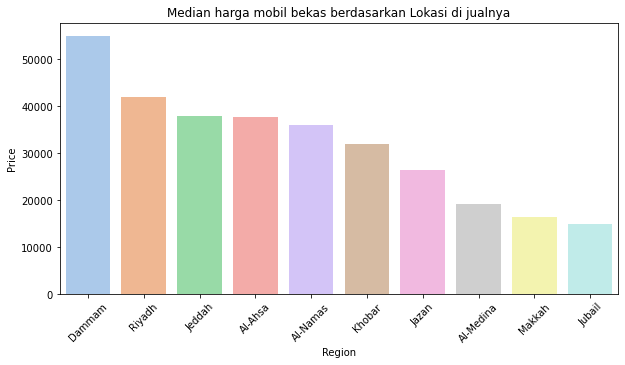

In [6]:
# 10 Wilayah dengan jumlah mobil bekas yang dijual terbanyak

reg = df.groupby(['Region'])['Price'].median().sort_values(ascending=False).iloc[:10]
plt.figure(figsize=(10,5))
sns.barplot(x=reg.index, y=reg, palette='pastel')
plt.title('Median harga mobil bekas berdasarkan Lokasi di jualnya')
plt.xticks(np.arange(len(reg.unique())), rotation=45)
plt.xlabel('Region')
plt.ylabel('Price')
plt.show()

Berdasarkan visualisasi diatas terlihat bahwa wilayah Dammam dan Riyadh merupakan wilayah yang memiliki median harga mobil tertinggi diantara wilayah lain yaitu lebih dari 40000 SAR.

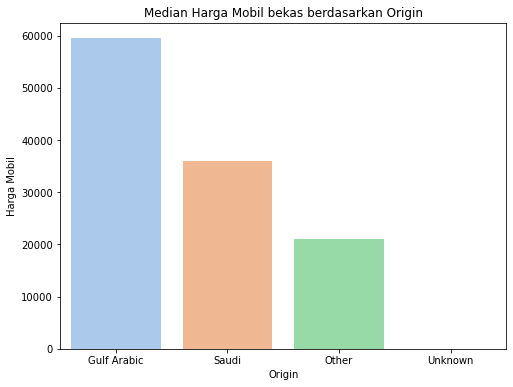

In [7]:
plt.figure(figsize=(8,6))
origin = df.groupby(['Origin'])['Price'].median().sort_values(ascending=False)
sns.barplot(x=origin.index, y=origin, palette='pastel')
plt.title('Median Harga Mobil bekas berdasarkan Origin')
plt.xlabel('Origin')
plt.ylabel('Harga Mobil')
plt.show()

Dari gambar diatas terlihat bahwa median tertinggi harga mobil bekas yang dijual berasal dari Saudi, namun terlihat bahwa terdapat value unknown pada kolom origin, data anomali ini akan kita tangani pada step cleaning.

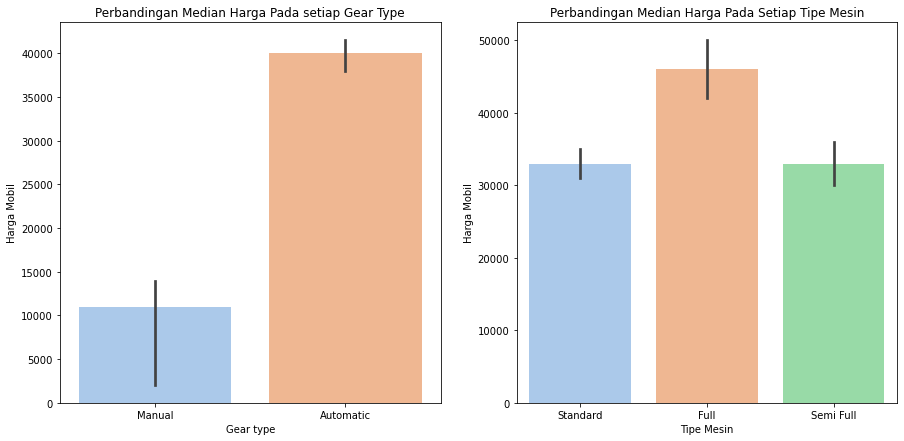

In [8]:
plt.figure(figsize=(15,7))

# Perbandingan median harga setiap gear type
plt.subplot(1,2,1)
sns.barplot(x=df['Gear_Type'], y=df['Price'], estimator=np.median, palette='pastel')
plt.title('Perbandingan Median Harga Pada setiap Gear Type')
plt.xlabel('Gear type')
plt.ylabel('Harga Mobil')


# Perbandingan median harga setiap tipe mesin
plt.subplot(1,2,2)
ax = sns.barplot(x=df['Options'], y=df['Price'], estimator=np.median, palette='pastel')
plt.title('Perbandingan Median Harga Pada Setiap Tipe Mesin')
plt.xlabel('Tipe Mesin')
plt.ylabel('Harga Mobil')
plt.show()

* Mobil automatic memiliki median harga yang jauh lebih tinggi dibandingkan mobil manual
* Mobil dengan tipe mesin full memiliki median harga paling tinggi dibandingkan dengan mobil dengan tipe mesin standar dan semi full

# Data Preprocessing

Pada tahap ini akan dilakukan cleaning pada data sehingga nantinya data yang sudah diberisihkan akan digunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
* Pengecekan terhadap data duplikat.
* Pengecekan anomali data dan jika ada lakukan treatment.
* Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
* Jika ada missing value lakukan treatment dengan cara *drop* fiturnya jika memang tidak diperlukan atau dengan mengimputasi dengan nilai yang plaing masuk akal sesuai dengan kasusnya.

Untuk proses data preprocessing dan feature engineering, datafram yang akan digunakan adalah dataframe hasil duplikasi dari dataframe yang sebelumnya.

In [9]:
# duplikasi dataframe
df_model = df.copy()

In [10]:
# Check duplikat data
df_model[df_model.duplicated(keep=False) == True]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
236,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
540,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
2012,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
3631,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0


In [11]:
# drop duplikat data
df_model.drop_duplicates(inplace=True)

In [12]:
# Untuk menampilkan nama variabel, tipe data, null, presentase null, jumlah unique, dan unique setiap kolom

data = []
for i in df_model.columns:
    data.append([
        i,
        df_model[i].dtypes,
        df_model[i].isna().sum(),
        round((df_model[i].isna().sum()/len(df))*100,2),
        df_model[i].nunique(),
        list(df_model[i].drop_duplicates().sample(2).values),
        
    ])
pd.DataFrame(data=data,
            columns=[
                'Nama Variabel',
                'Tipe Data',
                'Null',
                'Presentase Null',
                'Jumlah Unique',
                'Unique'
            ])

,Nama Variabel,Tipe Data,Null,Presentase Null,Jumlah Unique,Unique
0,Type,object,0,0.0,347,"[Kaptiva, Charger]"
1,Region,object,0,0.0,27,"[Al-Ahsa, Al-Medina]"
2,Make,object,0,0.0,58,"[BMW, Genesis]"
3,Gear_Type,object,0,0.0,2,"[Manual, Automatic]"
4,Origin,object,0,0.0,4,"[Gulf Arabic, Saudi]"
5,Options,object,0,0.0,3,"[Standard, Full]"
6,Year,int64,0,0.0,50,"[1993, 2009]"
7,Engine_Size,float64,0,0.0,71,"[5.8, 1.3]"
8,Mileage,int64,0,0.0,1716,"[36500, 110761]"
9,Negotiable,bool,0,0.0,2,"[True, False]"


Dari tabel diatas terlihat bahwa dataset ini tidak memiliki missing value, namun pada kolom Origin terdapat value Unknown sehingga harus diatasi

**Drop kolom yang tidak memiliki relevansi**

Setelah menghapus data duplikat dari dataset, selanjutnya kita akan droping kolom yang menurut kita tidak relevan/ tidak diperlukan, sebelum memutuskan untuk droping kolom tentu kita perlu pertimbangan, salah satu cara mempertimbangkannya adalah dengan menggunakan domain knowledge.

Berdasarkan domain knowledge, kolom 'Negotiable' tidak diperlukan untuk membangun model prediktif harga mobil bekas karena kolom tersebut hanya menjelaskan bahwa harga mobil tersebut masih bisa dinegosiasi atau tidak, jika bisa di negosiasi maka mobil terbut akan di set dengan harga 0.

In [13]:
# Drop kolom 'Negotiable'
df_model.drop(['Negotiable'], axis=1, inplace=True)

In [14]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5620 entries, 0 to 5623
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5620 non-null   object 
 1   Region       5620 non-null   object 
 2   Make         5620 non-null   object 
 3   Gear_Type    5620 non-null   object 
 4   Origin       5620 non-null   object 
 5   Options      5620 non-null   object 
 6   Year         5620 non-null   int64  
 7   Engine_Size  5620 non-null   float64
 8   Mileage      5620 non-null   int64  
 9   Price        5620 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 483.0+ KB


Kolom 'Negotiable' sudah tidak ada.

In [15]:
# replace value 'Unknown' menjadi 'Other' pada kolom Origin 

df_model['Origin'] = df_model['Origin'].replace('Unknown','Other')

In [16]:
df_model['Origin'].value_counts()

Saudi          4184
Other           739
Gulf Arabic     697
Name: Origin, dtype: int64

Selanjutnya, kita perlu mengecek apakah terdapat nilai-nilai yang dirasa tidak masuk akan pada setiap kolomnya, hal ini dapat kita cek melalui statistik deskriptif untuk setiap kolom numerikal.

In [17]:
# Cek statistik deskriptif untuk kolom numerik
df.describe()

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


* Terlihat bahwa pada kolom `Price` 25% datanya adalah data dengan nilai **0** yang mana hal ini tidak masuk akal sebuah mobil memiliki harga 0, artinya sama saja bahwa mobil tersebut akan diberi secara gratis kepada pelanggan. Maka dari itu data kolom 'Price' yang memiliki value 0 lebih baik di drop.
* Pada kolom `Mileage` memiliki nilai maksimum 20.000.000, nilai tersebut dirasa mustahil karena nilainya sangat besar, value seperti ini bisa menjadi data anomali. Selanjutnya kita akan tangani anomali pada kolom Miliage

In [18]:
# menghapus baris pada kolom price yang memiliki value '0'
df_model = df_model[df_model['Price'] != 0]

In [19]:
df_model.sort_values(by='Price', ascending=True)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3131,Yukon,Jubail,GMC,Automatic,Saudi,Full,2019,5.3,50000,1
3992,G80,Riyadh,Genesis,Automatic,Other,Semi Full,2018,3.8,170000,500
4399,Yaris,Riyadh,Toyota,Automatic,Saudi,Standard,2018,1.5,100000,850
5128,Rio,Arar,Kia,Automatic,Saudi,Standard,2019,1.4,55500,884
3474,Yaris,Najran,Toyota,Automatic,Saudi,Standard,2019,1.6,85000,950
...,...,...,...,...,...,...,...,...,...,...
4653,Range Rover,Riyadh,Land Rover,Automatic,Other,Full,2019,5.0,4200,599000
2120,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full,2016,6.0,40000,620000
4273,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2021,3.0,2500,748000
4684,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,800000


Berdasarkan hasil diatas terlihat bahwa sudah tidak terdapat mobil dengan harga 0, namun tenyata pada kolom harga terdapat value 1, 500, 850. Hal ini tidak masuk akal sebuah mobil memiliki harga yang sangat rendah, oleh karena itu kita akan menangani data anomali pada kolom price ini.

**Korelasi Data**

In [20]:
corr_mat = df_model.corr(method='spearman')
corr_mat

,Year,Engine_Size,Mileage,Price
Year,1.000000,-0.301332,-0.495930,0.419862
Engine_Size,-0.301332,1.000000,0.158042,0.377817
Mileage,-0.495930,0.158042,1.000000,-0.277270
Price,0.419862,0.377817,-0.277270,1.000000


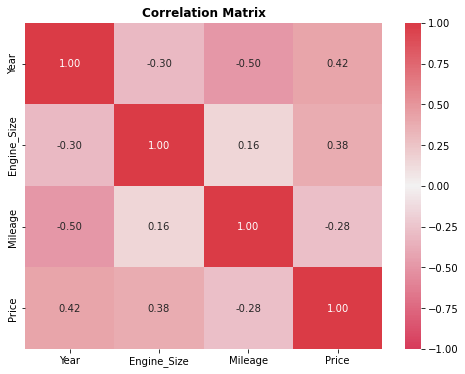

In [21]:
plt.figure(figsize=(8,6))
palette = sns.diverging_palette(5,10, n=200)
sns.heatmap(corr_mat, annot=True, vmax=1, vmin=-1, fmt='.2f', cmap=palette) # annot untuk munculin angka
plt.title('Correlation Matrix', size=12, weight='bold')
plt.show()

Correlation matrix menunjukkan bahwa tidak ada fitur yang memiliki korelasi yang kuat terhadap fitur price. Korelasi yang paling tinggi dimiliki oleh fitur 'Year' dan 'Engine_size' dengan fitur 'Price', dimana korelasinya adalah korelasi positif. Artinya semakin muda tahun keluaran mobil maka semakin tinggi harga mobil, juga semakin besar engine size maka semakin tinggi harga mobil.

Selanjutnya, kita akan mengecek distribusi data dan outliers untuk setiap fitur numerikal. Jika distirbusinya memiliki skewness yang tinggi, salah satu cara yang dapat dilakukan untuk mengurangi skewnessnya adalah dengan melakukan rekayasa pada setiap fiturnya.

**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, diantaranya adalah dengan mempertimbangkan sisi domain knowledge.

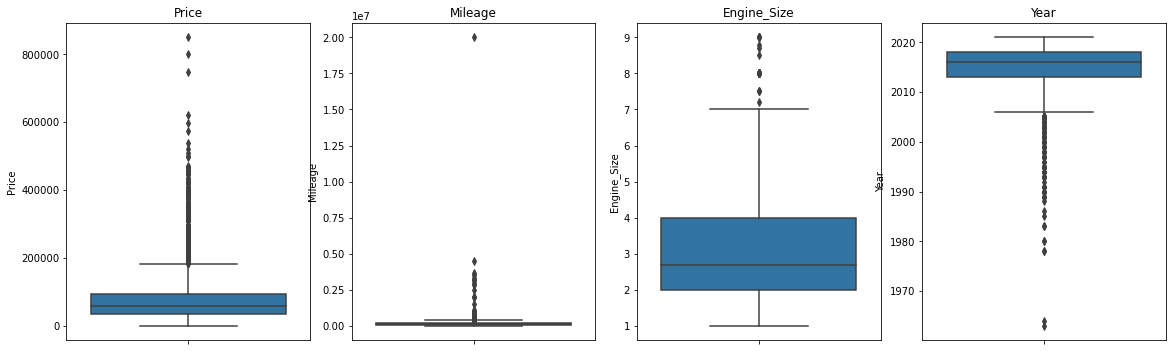

In [22]:
fig, axs =  plt.subplots(1, 4, figsize=(16, 5))
fig.tight_layout()
num = ["Price", "Mileage", "Engine_Size", "Year"]
pos = 0
for i in df_model[num].columns:
    sns.boxplot(y=df_model[i], ax = axs[pos])
    axs[pos].set_title(i)
    pos += 1

Terlihat pada gambar diatas bahwa terdapat banyak outliers pada fitur numerikal. Dalam project ini, untuk membuat dataset yang lebih bersih dari outliers akan dilakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Model yang dihasilkan hanya terbatas dapat memprediksi harga mobil bekas yang nilai-nilainya pada rentang data berdasarkan 'clean dataset', diluar rentang data hasil prediksi dari model akan menjadi bias.

In [23]:
# Def cari outliers
def cari_outliers(data):
    q1 = data.describe()['25%']
    q3 = data.describe()['75%']
    iqr = q3 - q1
    upper_fence = q3 + (1.5*iqr)
    lower_fence = q1 - (1.5*iqr)
    print(f'limit bawah: {lower_fence}')
    print(f'limit atas: {upper_fence}')

In [24]:
# outliers pada kolom price
cari_outliers(df_model['Price'])

limit bawah: -53875.0
limit atas: 183125.0


In [25]:
# outliers pada kolom Engine_Size
cari_outliers(df_model['Engine_Size'])

limit bawah: -1.0
limit atas: 7.0


In [26]:
# outliers pada kolom Mileage
cari_outliers(df_model['Mileage'])

limit bawah: -154500.0
limit atas: 385500.0


In [27]:
# Outliers pada kolom Year
cari_outliers(df_model['Year'])

limit bawah: 2005.5
limit atas: 2025.5


Selanjutnya, kita dapat memulai feature engineering terhadap fitur-fitur numerikal.

**Price**

In [28]:
df_model['Price'].describe()

count      3824.000000
mean      78019.245031
std       72748.182183
min           1.000000
25%       35000.000000
50%       58000.000000
75%       94250.000000
max      850000.000000
Name: Price, dtype: float64

In [29]:
df_model[df_model['Price'] > 183125].count()['Price']

259

terlihat bahwa 75% data pada kolom price bernilai kurang dari 94250, sedangkan nilai maksimmumnya adalah 850000 hal ini mengakibatkan adanya skewness pada distribusi price (positif skewed). 

Terdapat 259 data yang nilai pricenya > 183125 (batas atas data berdasarkan IQRnya), oleh karenanya harga mobil yang lebih besar dari 183125 tidak akan dimasukkan dalam model, sehingga skewness pada distribusi price akan berkurang, namun model yang nantinya dibangun akan memiliki batasan.

Pada [sumber](https://ksa.yallamotor.com/used-cars/toyota/camry/2017/used-toyota-camry-2017-riyadh-1307714) yang saya baca mengatakan bahwa tidak masuk akal menjual mobil bekas dibawah 1000 SAR dan pada sumber menuliskan bahwa harga mobil bekas yang paling rendah adalah 5000 SAR. Oleh karena itu, harga mobil < 5000 akan kita drop.

In [30]:
# Melakukan filtering pada data dengan drop price < 5000

df_model = df_model[(df_model['Price'] >= 5000)]

In [31]:
df_model.sort_values('Price', ascending=False)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3513,Bentayga,Dammam,Bentley,Automatic,Saudi,Full,2019,6.0,13000,850000
4684,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,800000
4273,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2021,3.0,2500,748000
2120,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full,2016,6.0,40000,620000
4653,Range Rover,Riyadh,Land Rover,Automatic,Other,Full,2019,5.0,4200,599000
...,...,...,...,...,...,...,...,...,...,...
110,Optra,Riyadh,Chevrolet,Automatic,Saudi,Standard,2007,1.6,2000000,5000
2612,Suburban,Aseer,GMC,Automatic,Saudi,Semi Full,1990,3.5,140000,5000
3052,Expedition,Al-Medina,Ford,Automatic,Saudi,Semi Full,2003,5.4,400000,5000
693,Accent,Dammam,Hyundai,Manual,Saudi,Standard,2005,1.5,294602,5000


In [32]:
df_model = df_model[df_model['Price'] <= 183125]

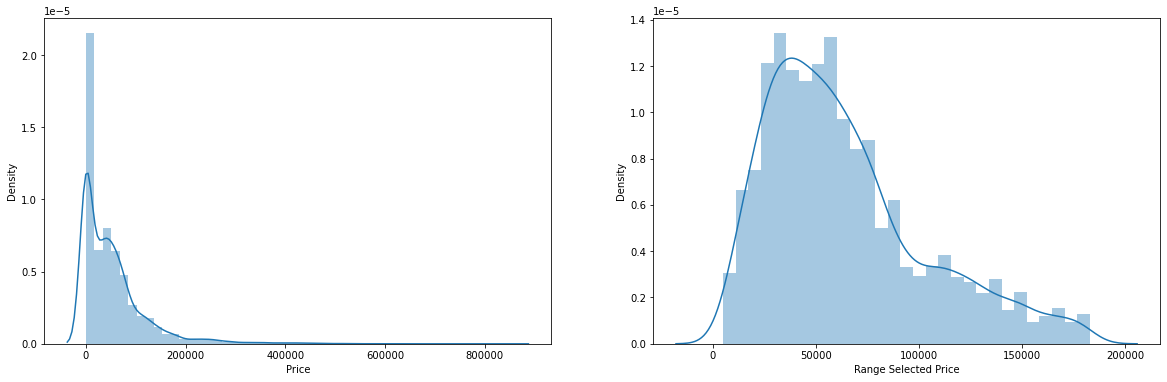

In [33]:
# plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(20, 6))
sns.distplot(df['Price'], ax=axes[0])
sns.distplot(df_model['Price'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price');

**Mileage**

Berdasarkan [Sumber](https://www.sciencedirect.com/science/article/pii/S0140988320303662) yang saya baca menyatakan bahwa di Arab Saudi rata-rata mileage untuk mobil bekas adalah 16000 per tahun, sehingga diasumsikan bahwa nilai maksimum mileage yang masuk akal adalah usia mobil tertua pada dataset dikali 16000

In [34]:
df_model.sort_values(by='Year',ascending=True).head(1)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
5012,Other,Riyadh,Ford,Manual,Saudi,Standard,1963,1.0,300,22000


Nilai maksimum mileage pada dataset ini seharusnya adalah 59 x 16000 = 944000. Mileage lebih dari 944000 akan kita drop

In [35]:
df_model[df_model['Mileage'] > 944000].count()

Type           16
Region         16
Make           16
Gear_Type      16
Origin         16
Options        16
Year           16
Engine_Size    16
Mileage        16
Price          16
dtype: int64

In [36]:
df_model = df_model[df_model['Mileage'] <= 944000]

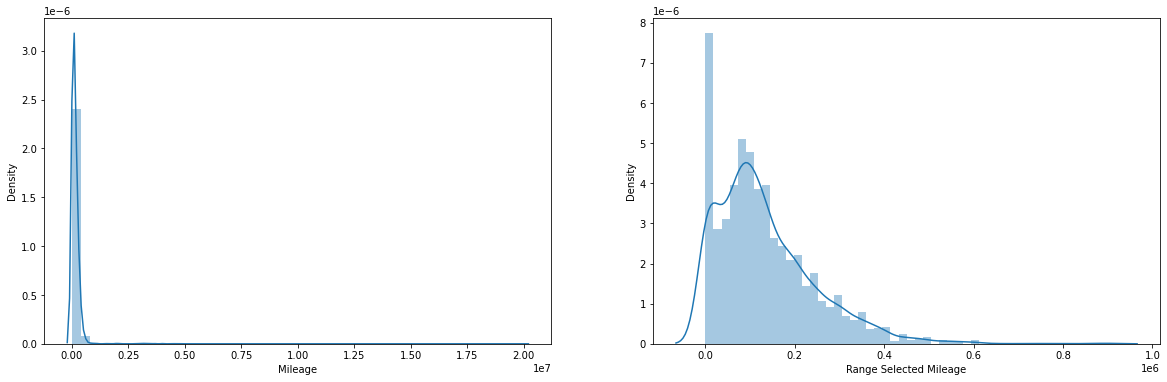

In [37]:
# plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(20, 6))
sns.distplot(df['Mileage'], ax=axes[0])
sns.distplot(df_model['Mileage'], ax=axes[1])
axes[0].set_xlabel('Mileage')
axes[1].set_xlabel('Range Selected Mileage');

Terlihat pada gambar sebelah kanan adalah gambar distribusi Mileage yang sudah di filter, pada tahap selanjutnya fitur Mileage ini akan dilakukan binning equal frequency karena  masih memiliki outlier.

**Year**

In [38]:
df[df['Year'] < 2005].count()['Year']

341

Berdasarkan IQR, terdapat 341 data yang nilai year < 2005, oleh karenanya mobil yang dibuat sebelum tahun 2005 tidak akan dimasukkan dalam model, hal ini akan mengurangi skewness pada fitu year namun akan membuat model yang akan dibangun memiliki batasan atau limitasi.

In [39]:
# Drop value < 2005 pada kolom 'Year'
df_model = df_model[df_model['Year'] >= 2005]

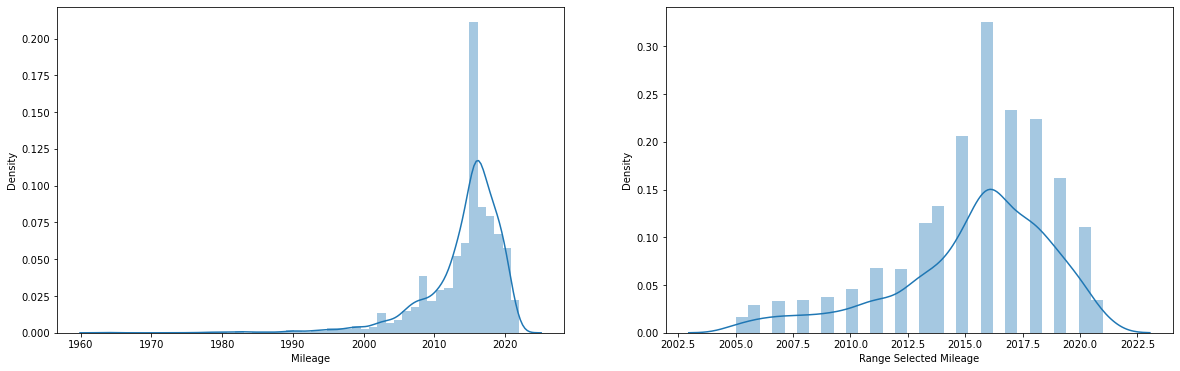

In [40]:
# plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(20, 6))
sns.distplot(df['Year'], ax=axes[0])
sns.distplot(df_model['Year'], ax=axes[1])# menggambar distribusi data setelah filtering
axes[0].set_xlabel('Mileage')
axes[1].set_xlabel('Range Selected Mileage');

In [41]:
# Dataset yang sudah clean
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3337 entries, 1 to 5622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3337 non-null   object 
 1   Region       3337 non-null   object 
 2   Make         3337 non-null   object 
 3   Gear_Type    3337 non-null   object 
 4   Origin       3337 non-null   object 
 5   Options      3337 non-null   object 
 6   Year         3337 non-null   int64  
 7   Engine_Size  3337 non-null   float64
 8   Mileage      3337 non-null   int64  
 9   Price        3337 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 286.8+ KB


In [42]:
corr_mat = df_model.corr(method='spearman')
corr_mat

,Year,Engine_Size,Mileage,Price
Year,1.000000,-0.368107,-0.495750,0.378405
Engine_Size,-0.368107,1.000000,0.206104,0.404085
Mileage,-0.495750,0.206104,1.000000,-0.251882
Price,0.378405,0.404085,-0.251882,1.000000


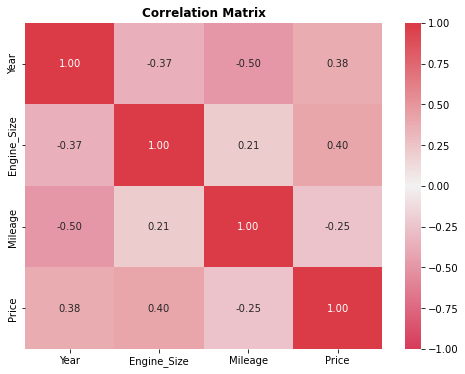

In [43]:
plt.figure(figsize=(8,6))
palette = sns.diverging_palette(5,10, n=200)
sns.heatmap(corr_mat, annot=True, vmax=1, vmin=-1, fmt='.2f', cmap=palette) # annot untuk munculin angka
plt.title('Correlation Matrix', size=12, weight='bold')
plt.show()

# Modeling

In [44]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score

**Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur kategorikal harus diubah menjadi fitur numerikal menggunakan encoding. Kali ini akan digunakan Column Transformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

Untuk fitur `Options`, `Origin`, dan `Gear type` encoding yang digunakan adalah onehot encoding, sedangkan fitur `Type`, `Region`, dan `Make` menggunakan binary encoding, dan untuk fitur `Mileage` dilakukan binning equal frequency.

In [45]:
# mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Options','Origin','Gear_Type']),
    ('binary', ce.BinaryEncoder(), ['Type','Region','Make']),
    ('binner', KBinsDiscretizer(n_bins=4, encode='onehot', strategy='quantile'), ['Mileage'])
], remainder='passthrough')

**Data Splitting**

In [46]:
# Memisahkan fitur dengan target
x = df_model.drop(['Price'], axis=1)
y = df_model['Price']

**Train dan Test Splitting**

In [47]:
# splitting data train dan test denga proporsi 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2020)

**Choose a Benchmark Model**

In [48]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
rd = Ridge(alpha=0.001)
ls = Lasso(alpha=0.001)
dt = DecisionTreeRegressor(random_state=2020)
rf = RandomForestRegressor(random_state=2020)
xgb = XGBRegressor(random_state=2020)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_rd = TransformedTargetRegressor(rd, func=np.log, inverse_func=np.exp)
log_ls = TransformedTargetRegressor(ls, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_rd, log_ls, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=2020)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-25588.93011315 -26935.3293754  -27878.743689   -26253.6701893
 -24820.50331644] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-17116.19259286 -18365.57475345 -17463.74944726 -18199.97941811
 -17597.3261428 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.30792837 -0.3159457  -0.27673582 -0.31036842 -0.32956428] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-18148.46837999 -20741.75696863 -19486.68791698 -20453.12890699
 -18694.15196656] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-12285.98259542 -13647.22982955 -13035.89179143 -12247.95797047
 -11960.40173106] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
 

In [49]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'Ridge', 'Lasso','DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse, 'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae, 'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape, 'Std_MAPE': nilai_std_mape})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-26295.435337,1057.605611,-17748.564471,466.554169,-0.308109,0.017385
1,KNN Regressor,-19504.838828,992.623191,-12635.492784,618.388187,-0.232479,0.011110
2,Ridge,-26296.243935,1058.144998,-17748.873513,466.569046,-0.308099,0.017389
3,Lasso,-26339.522148,1043.294281,-17718.864953,392.449871,-0.308017,0.017281
4,DecisionTree Regressor,-24791.371221,1785.499602,-15437.114134,752.104513,-0.290538,0.026745
5,RandomForest Regressor,-18865.036935,1485.737013,-11947.613069,811.408929,-0.212946,0.011950
6,XGBoost Regressor,-16847.271803,1755.406477,-10851.443628,879.512630,-0.189943,0.008953


Terdapat perbedaan yang cukup sinifikan antara nilai RMSE dan MAE, dimana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat niali-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

Berdasarkan nilai RMSE, MAE, dan MAPE model XGBoost adalah model terbaik karena memiliki nilai paling rendah. Setelah itu akan dilakukan prediksi pada test set dengan benchmark XGboost sebagai model terbaik.

Algoritma XGBoost basicnya adalah decision tree. Secara garis besar model ini bekerja dengan membangun satu tree model dengan penyesuaian data, kemudian tree model berikutnya dibangun untuk mengurangi error  dengan memberikan weight (bobot) pada data yang prediksinya salah. Proses evaluasi ini dilakukan sampai dengan instruksi yang diberikan berakhir. Hasil tiap pohon keputusan kemudian akan dilakukan majority voting untuk menentukan final prediksi.

Pada dasarnya, algoritma ini sama dengan algoritma gradient boost hanya saja menggunakan beberapa proses tambahan sehingga lebih powerful. Proses tersebut adalah pemangkasan, newton boosting, dan parameter pengacakan ekstra. Proses pemangkasan atau penyusutan proporsional simpul daun digunakan untuk meningkatkan generalisasi model. proses newton boosting adalah proses untuk menyediakan rute langsung sehingga tidak memerlukan penurunan gradient. Proses pengacakan parameter bertujuan untuk mengurangi korelasi antar tree sehingga dapat meningkatkan kekuatan algoritma ensemble.

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan model XGBoost

In [50]:
mod = {'xgb' : XGBRegressor(random_state=2020)}

# Benchmark model XGBoost
xgb = XGBRegressor(random_state = 2020)
estimator = Pipeline([
    ("preprocessing", transformer),
    ("model", xgb)
])

estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
mae_xgb = mean_absolute_error(y_test, y_pred)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred)

score_before_tuning = pd.DataFrame({'RMSE': rmse_xgb, 'MAE': mae_xgb, 'MAPE': mape_xgb}, index=mod.keys())
score_before_tuning

,RMSE,MAE,MAPE
xgb,17322.227348,11120.318708,0.200699


Setelah dilakukan prediksi pada test set didapatkan nilai MAPE sebesar 20%, setelah ini akan dilakukan hyperparameter tuning dengan harapan dapat meningkatkan performa model.

**Hyperparameter Tuning**

Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Pada XGBoost terdapat beberapa kategori parameter yang bisa dituning, diantaranya adalah:
* general parameter: booster, verbosity
* parameter for tree booster: eta (learning_rate), gamma, max_depth, subsample, lambda, alpha, scale_pos_weight

Pada kali ini akan dilakukan hyperparameter tuning dengan beberapa parameter, diantaranya:
1. max_depth
2. eta (learning_rate)
3. n_estimator
4. gamma

[source hyperparameter tuning XGBoost model](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters)

In [51]:
# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': [4,5,6,7,8], 
    'model__learning_rate': [0.1,0.05,0.01],
    'model__n_estimators': [100,125,150,175,200],
    'model__gamma': [0,3,5,7]
}

Penjelasan hyperparameter XGBoost:
- max_depth: maksimum kedalaman pohon. Semakin tinggi nilai max_depth dapat meningkatkan performa model namun dapat meningkatkan kompleksitas model dan dapat menyebabkan overfitting.
- learning_rate: pengurangan step size yang digunakan untuk mencegah overfitting. Setiap setelah dilakukan boosting kita akan mendapatkan weight untuk fitur baru dari hasil boosting sebelumnya, dan learning rate mengecilkan weight fitur agar proses boosting lebih konservatif.
- n_estimator: jumlah operasi yang akan dicoba dipelajari oleh model
- gamma: parameter psuedo-regularization yang bergantung dengan parameter lain. Semakin besar gamma, semakin konservatif algoritmanya.

[source hyperparameter tuning XGBoost model](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters)

In [52]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=2020)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=2020)

# Hyperparameter tuning
random_xgb = GridSearchCV(
    estimator_xgb, 
    param_grid = hyperparam_space_xgb,
    cv = crossval, 
    scoring = 'neg_mean_absolute_percentage_error', 
    n_jobs = -1 
)

In [53]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Options',
                                                                          'Origin',
                                                                          'Gear_Type']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['Type',
                                                                          'Region',
                                                                          'Make']),
                                                                        ('binner',
                                                                         KBinsDiscretizer(n_bins=4),
                                                                         ['Mileage'])])),
                                       ('model',...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=2020, ...))]),
             n_jobs=-1,
             param_grid={'model__gamma': [0, 3, 5, 7],
                         'model__learning_rate': [0.1, 0.05, 0.01],
                         'model__max_depth': [4, 5, 6, 7, 8],
                         'model__n_estimators': [100, 125, 150, 175, 200]},
             scoring='neg_mean_absolute_percentage_error')

In [54]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values('rank_test_score',ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__gamma,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
89,1.564410,0.131460,0.045678,0.009677,3,0.1,6,200,"{'model__gamma': 3, 'model__learning_rate': 0....",-0.230174,-0.221096,-0.191872,-0.201523,-0.241326,-0.217198,0.018182,1
239,1.654889,0.193322,0.042087,0.007501,7,0.1,6,200,"{'model__gamma': 7, 'model__learning_rate': 0....",-0.230174,-0.221096,-0.191872,-0.201523,-0.241326,-0.217198,0.018182,1
14,1.604313,0.162731,0.043683,0.009719,0,0.1,6,200,"{'model__gamma': 0, 'model__learning_rate': 0....",-0.230174,-0.221096,-0.191872,-0.201523,-0.241326,-0.217198,0.018182,1
164,1.654099,0.208533,0.048670,0.014011,5,0.1,6,200,"{'model__gamma': 5, 'model__learning_rate': 0....",-0.230174,-0.221096,-0.191872,-0.201523,-0.241326,-0.217198,0.018182,1
13,1.605300,0.133807,0.048470,0.007611,0,0.1,6,175,"{'model__gamma': 0, 'model__learning_rate': 0....",-0.230639,-0.220653,-0.192060,-0.202798,-0.240104,-0.217251,0.017644,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,1.091277,0.138435,0.036901,0.002360,5,0.01,7,100,"{'model__gamma': 5, 'model__learning_rate': 0....",-0.328604,-0.374216,-0.363682,-0.363410,-0.392754,-0.364533,0.020895,293
70,1.317281,0.167130,0.039196,0.002593,0,0.01,8,100,"{'model__gamma': 0, 'model__learning_rate': 0....",-0.332955,-0.378131,-0.375848,-0.372759,-0.396640,-0.371267,0.020890,297
220,1.357763,0.153184,0.042885,0.005884,5,0.01,8,100,"{'model__gamma': 5, 'model__learning_rate': 0....",-0.332955,-0.378131,-0.375848,-0.372759,-0.396640,-0.371267,0.020890,297
295,1.431765,0.126167,0.046675,0.007684,7,0.01,8,100,"{'model__gamma': 7, 'model__learning_rate': 0....",-0.332955,-0.378131,-0.375848,-0.372759,-0.396640,-0.371267,0.020890,297


In [55]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -0.21719819846113114
Best_params: {'model__gamma': 0, 'model__learning_rate': 0.1, 'model__max_depth': 6, 'model__n_estimators': 200}


**Predict to test set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost yang sudah dilakukan hyperparameter tuning

In [56]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=2020)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(x_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(x_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,17029.313656,10738.66677,0.194108


**Perbandingan performa model XGBoost sebelum dan setelah dilakukan hyperparameter tuning**

In [57]:
# Sebelum hyperparameter tuning
print('Sebelum dilakukan Hyperparameter tuning')
score_before_tuning

Sebelum dilakukan Hyperparameter tuning


,RMSE,MAE,MAPE
xgb,17322.227348,11120.318708,0.200699


In [58]:
# Setelah hyperparameter tuning
print('Setelah dilakukan Hyperparameter tuning')
score_after_tuning

Setelah dilakukan Hyperparameter tuning


,RMSE,MAE,MAPE
XGB,17029.313656,10738.66677,0.194108


Berdasarkan nilai RMSE, MAE, dan MAPE terlihat bahwa nilai tersebut berkurang ketika dilakukan hyperparameter tuning sehingga performa model naik. Model yang akan digunakan adalah model XGBoost yang telah dilakukan hyperparameter tuning

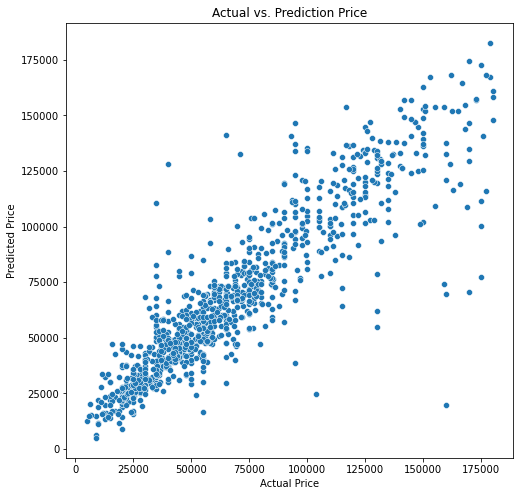

In [59]:
plt.figure(figsize=(8, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')
plt.show()

Scatterplot diatas menunjukkan bahwa model yang dibuat cukup linear terhadap harga aktual. Namun adanya nilai-nilai error yang besar membuat perbedaan yang cukup signifikan antaran nilai RMSE dan MAE. Hal ini dapat tergambarkan pada plot diatas, di mana terdapat harga aktual yang rendah namun prediksinya lebih tinggi (over estimation), dan harga aktual yang tinggi namun di prediksi lebih rendah (under estimation). Tetapi nilai MAPE yang didapat sekitar 19.4% menjadikan model ini dapat dikateogrikan ke dalam 'reasonable forecasting'.

**Feature Importances**

Feature importances digunakan untuk mengetahui fitur apa saja yang sangat memengaruhi target. 

In [60]:
# xgb_tuning[0].transformers_

In [61]:
xgb_tuning[0].transformers_[0][1].get_feature_names()

array(['x0_Semi Full', 'x0_Standard', 'x1_Other', 'x1_Saudi', 'x2_Manual'],
      dtype=object)

In [62]:
xgb_tuning[0].transformers_[1][1].get_feature_names()

['Type_0',
 'Type_1',
 'Type_2',
 'Type_3',
 'Type_4',
 'Type_5',
 'Type_6',
 'Type_7',
 'Type_8',
 'Region_0',
 'Region_1',
 'Region_2',
 'Region_3',
 'Region_4',
 'Make_0',
 'Make_1',
 'Make_2',
 'Make_3',
 'Make_4',
 'Make_5']

In [63]:
xgb_tuning[0].transformers_[2][1].get_feature_names_out()

array(['Mileage_0.0', 'Mileage_1.0', 'Mileage_2.0', 'Mileage_3.0'],
      dtype=object)

In [64]:
x.columns[xgb_tuning[0].transformers_[3][2]]

Index(['Year', 'Engine_Size'], dtype='object')

In [65]:
feature = list(xgb_tuning[0].transformers_[0][1].get_feature_names()) + xgb_tuning[0].transformers_[1][1].get_feature_names() + list(xgb_tuning[0].transformers_[2][1].get_feature_names_out()) + list(x.columns[xgb_tuning[0].transformers_[3][2]])

In [66]:
x_train_preprocessed = pd.DataFrame(transformer.fit_transform(x_train))
x_test_preprocessed = pd.DataFrame(transformer.transform(x_test))

In [67]:
x_train_preprocessed.columns = feature
x_test_preprocessed.columns = feature

<AxesSubplot:>

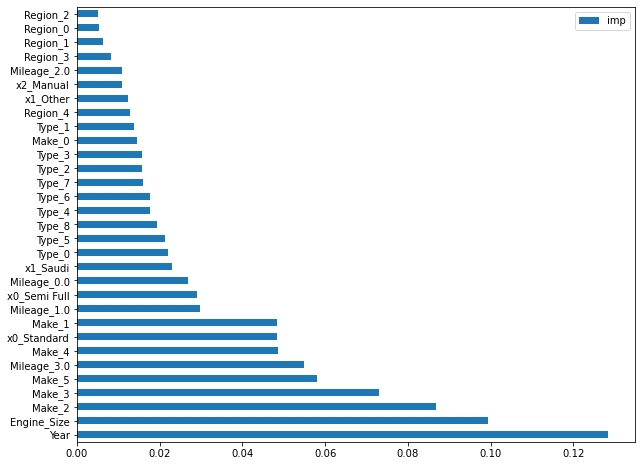

In [68]:
# plot feature importances

pd.DataFrame({
    'imp' : xgb_tuning['model'].feature_importances_
}, index=feature).sort_values('imp', ascending=False).plot(kind='barh', figsize=(10,8))

# Conclusion

Berdasarkan pemodelan yang telah dilakukan, fitur `Year`, `Engine size`, dan `Make` menjadi fitur yang paling berpengaruh terhadap `Price` mobil bekas di Saudi Arabia.

Metriks evaluasi yang digunakan pada model ini adalah MAPE. Ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar 19.4%. Model yang dibuat ini digunakan untuk memperkirakan harga mobil bekas di Saudi Arabia pada rentang nilai yang telah dilatih pada model, maksimal 183125 SAR), maka perkiraan harganya akan meleset kurang lebih sebesar 19.4% dari harga seharusnya. Namun, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena adanya bias pada model.

Model ini dapat diimporvisasi agar menghasilkan prediksi yang lebih baik lagi, namun kita dapat melakukan A/B testing terhadap model yang sudah dibuat ini untuk mengetahui tingkat efektivitas penggunaan model terhadap peningkatan jumlah penjualan mobil bekas ini. Nantinya, dari hasil A/B testing kita akan mendapatkan insight lain terkait hal apa saja yang dapat diperbaiki pada model.

# Recommendation

1. Mengecek prediksi mana saja yang memiliki nilai error yang tinggi dengan cara mengelompokkan error tersebut ke dalam grup overestimation dan underestimation. setelahnya kita dapat mengecek hubungan antara error tersebut dengan tiap variabel independen. Pada akhirnya kita bisa mengetahui sebenarnya variabel mana saja dan aspek apa saja yang menyebabkan model menghasilkan error yang tinggi, sehingga kita bisa melakukan training ulang dengan penerapan feature engineering yang lain.
1. Melakukan penambahan data menjadi lebih banyak lagi sehingga model mendapatkan referensi data lebih banyak untuk dipelajari. Penambahan data dapat dilakukan dengan penambahan data terkini untuk mobil bekas di Saudi Arabia sehingga dapat mengimprovisasi kapasitas prediksi dari model.
1. Menambahkan fitur yang memiliki korelasi dengan price mobil, seperti kondisi mobil, garansi resmi mobil, dan lain-lain.
2. Menambahkan fitur yang membedakan antara mobil classic atau mobil biasa (operasional sehari-hari), karena antara mobil classic dengan mobil biasa memberikan hasil korelasi yang berbeda dari harga terhadap mileagenya. Sebagai contoh, mobil pada tahun 1980 akan lebih mahal daripada mobil tahun 2007. Namun, untuk mengkategorikan hal tersebut diperlukan domain knowledge mengenai apa saja mobil yang termasuk dalam mobil classic. Adanya perbedaan ini akan memengaruhi model secara signifikan.
3. Untuk Mobil dengan kategori mobil mewah lebih baik dibuat model tersendiri atau mungkin platform ini dikhususkan untuk menjual mobil biasa yang digunakan untuk sehari-hari, karena dengan adanya data mobil mewah akan memengaruhi model secara signifikan.


# Save Model

In [69]:
# Import library pickle
import pickle

In [70]:
# save model

xgb_tuning = random_xgb.best_estimator_
xgb_tuning.fit(x,y)

pickle.dump(xgb_tuning, open('model_used_car_saudi.sav', 'wb'))

In [71]:
# Load model
loaded_model = pickle.load(open('model_used_car_saudi.sav', 'rb'))
# np.sqrt(mean_absolute_percentage_error(y, loaded_model.predict(x)))